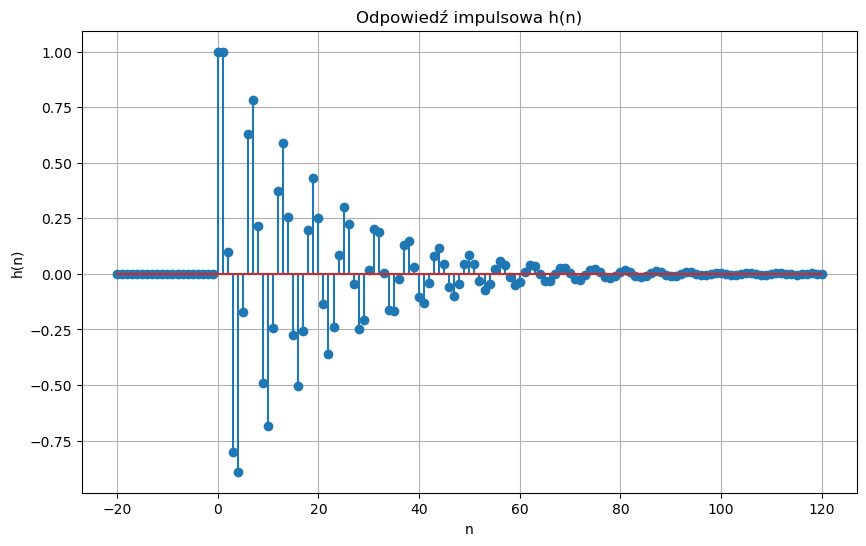

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Współczynniki przy y (lewa strona równania: y(n) - y(n-1) + 0.9y(n-2))
a = [1, -1, 0.9]
# Współczynniki przy x (prawa strona równania: x(n))
b = [1]

# Definiujemy zakres n dla obliczeń (dla n >= 0)
n_calc_end = 120
input_length = n_calc_end + 1 # Długość od n=0 do n=120

# Tworzymy wektor wejściowy x(n) - impuls jednostkowy
x = np.zeros(input_length)
x[0] = 1 

# Używamy funkcji scipy.signal.lfilter do obliczenia odpowiedzi dla n >= 0.
h_calc = signal.lfilter(b, a, x)

# Przygotowujemy dane do wykreślenia dla pełnego zakresu n (-20 do 120).
n_plot_start = -20
n_plot_end = 120
n_plot = np.arange(n_plot_start, n_plot_end + 1) # Tworzymy wektor n od -20 do 120

# Odpowiedź impulsowa h(n) jest 0 dla n < 0
num_zeros_before = abs(n_plot_start) # Liczba zer do dodania przed

# Łączymy wektor zer z obliczoną odpowiedzią
h_plot = np.concatenate((np.zeros(num_zeros_before), h_calc))

# Wykreśl odpowiedź impulsową.
plt.figure(figsize=(10, 6)) # Opcjonalnie ustawiamy rozmiar wykresu
plt.stem(n_plot, h_plot)
plt.title('Odpowiedź impulsowa h(n)')
plt.xlabel('n')
plt.ylabel('h(n)')
plt.grid(True)
plt.show() # Wyświetla wykres

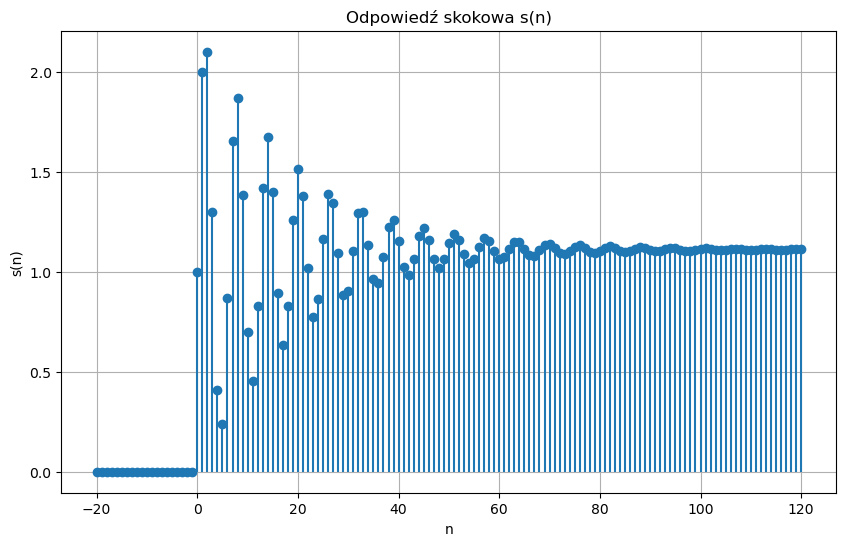

In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Współczynniki filtru: y(n) - y(n-1) + 0.9 y(n-2) = x(n)
a = [1, -1, 0.9]
b = [1]

# Zakres n od -20 do 120
n_start = -20
n_end = 120
n = np.arange(n_start, n_end + 1)

# Wejście: jednostkowy skok u(n) = 1 dla n >= 0
input_length = n_end + 1  # próbki od n=0 do n=120
u = np.ones(input_length)

# Obliczamy odpowiedź na skok
s_calc = signal.lfilter(b, a, u)

# Dla n < 0 odpowiedź = 0
num_zeros = abs(n_start)
s = np.concatenate((np.zeros(num_zeros), s_calc))

# Wykres odpowiedzi skokowej
plt.figure(figsize=(10, 6))
plt.stem(n, s, basefmt=" ")
plt.title('Odpowiedź skokowa s(n)')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid(True)
plt.show()

In [4]:
import numpy as np

# Krok 2: Zdefiniuj współczynniki mianownika A(z)
# Współczynniki A(z) jako wielomian od z (z^2 - z + 0.9)
a = [1, -1, 0.9]

# Krok 3: Znajdź pierwiastki wielomianu (bieguny) za pomocą numpy.roots
poles = np.roots(a)

print("Obliczone bieguny:")
print(poles)

# Krok 4: Oblicz moduły biegunów i sprawdź, czy są mniejsze niż 1.
print("\nModuły biegunów:")
pole_magnitudes = np.abs(poles)
print(pole_magnitudes)

# Sprawdzamy, czy wszystkie moduły są mniejsze niż 1
is_stable = np.all(pole_magnitudes < 1)

print("\nAnaliza stabilności:")
if is_stable:
    print("System jest stabilny (BIBO), ponieważ wszystkie bieguny leżą wewnątrz okręgu jednostkowego (|z| < 1).")
else:
    print("System jest niestabilny, ponieważ co najmniej jeden biegun leży na lub poza okręgiem jednostkowym (|z| >= 1).")

# Możemy również wydrukować dokładne wartości pierwiastków i ich modułów
print("\nSzczegóły biegunów:")
for i, pole in enumerate(poles):
    print(f"Biegun {i+1}: {pole}, Moduł: {abs(pole):.4f}")

Obliczone bieguny:
[0.5+0.80622577j 0.5-0.80622577j]

Moduły biegunów:
[0.9486833 0.9486833]

Analiza stabilności:
System jest stabilny (BIBO), ponieważ wszystkie bieguny leżą wewnątrz okręgu jednostkowego (|z| < 1).

Szczegóły biegunów:
Biegun 1: (0.5+0.806225774829855j), Moduł: 0.9487
Biegun 2: (0.5-0.806225774829855j), Moduł: 0.9487
